# Import Libs

In [2]:
import pandas as pd #data manipulation and analysis
import numpy as np # multi-dimensional arrays and matrices and mathematical functions to operate on these arrays.
import matplotlib.pyplot as plt # plotting library

# Retrieve the data

In [3]:
# charger les donnees a partir d'un fichier csv
data = pd.read_csv('Salary_Data.csv')

In [4]:
# voir les 5 premieres instance
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
# Voir les informations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# Preparing the data

In [6]:
# Selectionner les colonnes "YearsExperience" comme variable d'entree
# et la colonne "Salary" comme variable cible
X = data[['YearsExperience']]
y = data['Salary']

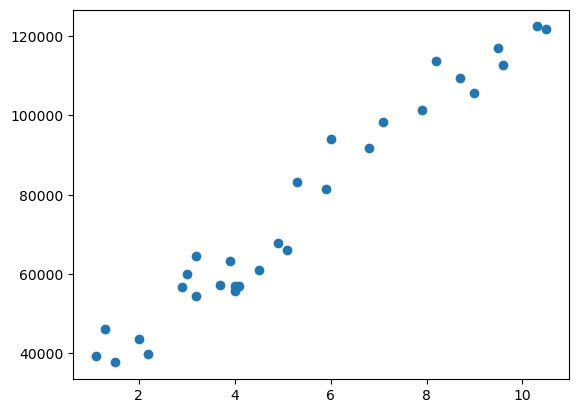

In [7]:
# Mettre les points sur un graphique
plt.scatter(X,y)

In [8]:
# Separer la dataset en train et test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

/Users/user/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Build and train a model

In [14]:
# Importer la librairie LinearRegression()
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # instancier

In [15]:
regressor.fit(X_train, y_train) # Entrainement = produire l'equation lineaire

LinearRegression()

In [16]:
# Retrouver les coefficient et l'ordonnee a l'origine
print(regressor.coef_)
print(regressor.intercept_)

[9345.94244312]
26816.192244031183


Text(0, 0.5, 'Salary')

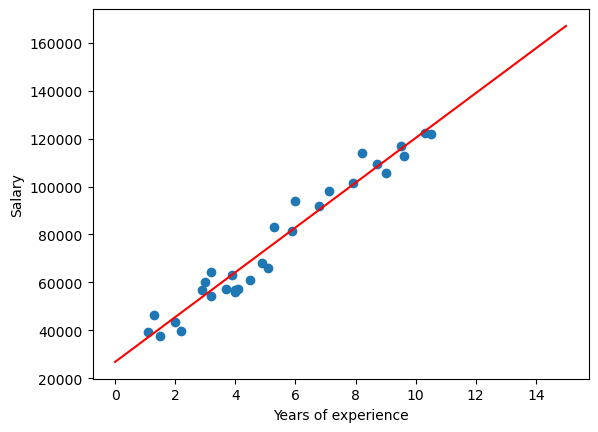

In [20]:
# Ajouter sur le graphique la droite
ordonne = np.linspace(0,15,1000)
plt.scatter(X,y)
plt.plot(ordonne,regressor.coef_[0]*ordonne+regressor.intercept_,color='r')
plt.xlabel('Years of experience')
plt.ylabel('Salary')

# Evaluate

In [32]:
# Predictions sur la base de test
y_predict = regressor.predict(X_test)

In [30]:
# Metrique
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
print('Rcarre:', metrics.r2_score(y_test, y_predict))

MAE: 3426.4269374307078
MSE: 21026037.329511296
RMSE: 4585.4157204675885
Rcarre: 0.9749154407708353


In [36]:
NewData = [[5],[4]]
#NewTest = pd.DataFrame(NewData,columns=['New Data'])
y_new = regressor.predict(NewData)
y_new

/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([73545.90445964, 64199.96201652])